# Titanic survived Project

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [134]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [135]:
df.shape

(891, 12)

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [138]:
print("the rows and columns in the dataset:", df.columns)
print("dimensions in the dataset:", df.shape)

the rows and columns in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
dimensions in the dataset: (891, 12)


In [139]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [140]:
df.isnull().sum()
#checking if null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# handling the missing values in the data set

In [142]:
# dropping the cabin column from data frame as most of the values are not present
df=df.drop(columns='Cabin',axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [143]:
# replace the age column with the mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [144]:
# to handle the embarked column, as only two values are repeating so finding the mean of the column to evaluate how many times the value is repeated highest number of times
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [145]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [146]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Plotting the variables of the dataset

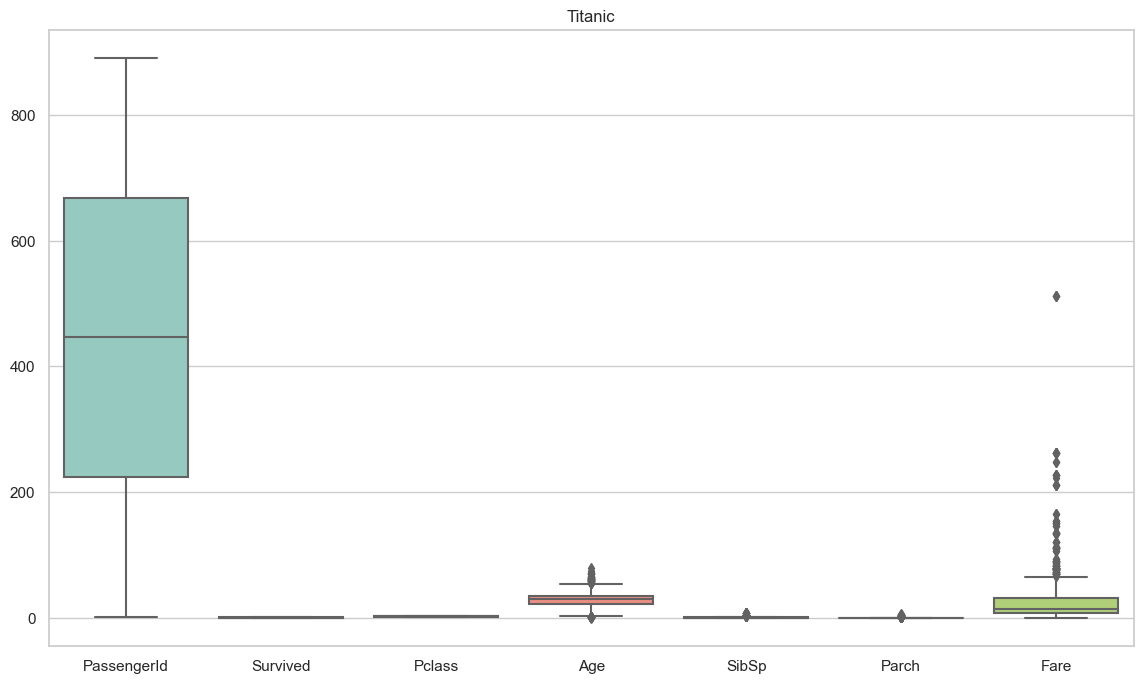

In [147]:
# box plot to show the variation of variables 
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df, palette="Set3")
plt.title('Titanic')
plt.show()

In [148]:
#statistical analysis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [149]:
#finding the number of people who survived and who didn't
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

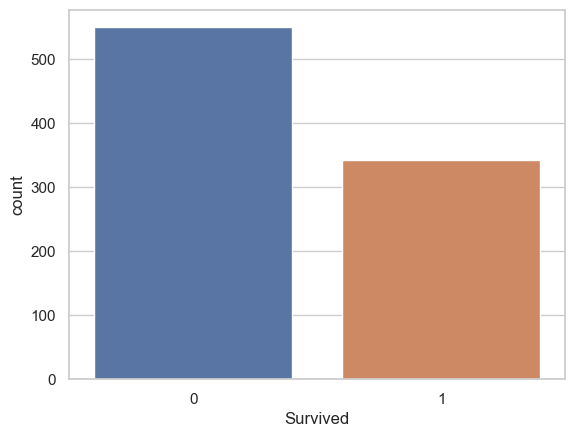

In [150]:
sns.countplot(x='Survived',data=df)

male      577
female    314
Name: Sex, dtype: int64

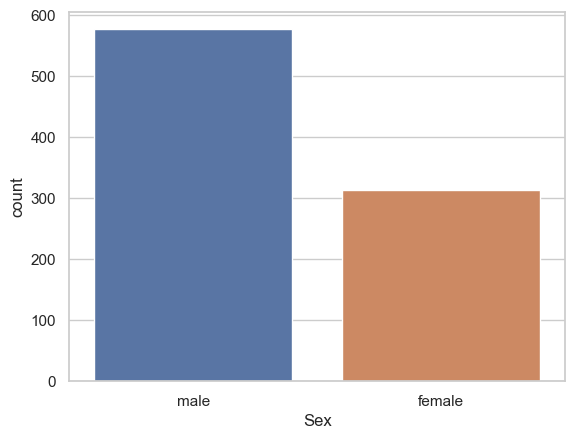

In [151]:
sns.countplot(x='Sex',data=df)
df['Sex'].value_counts()

<Axes: xlabel='Sex', ylabel='count'>

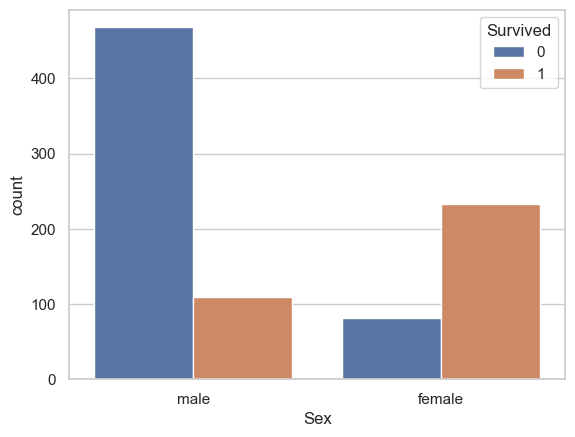

In [152]:
sns.countplot(x='Sex',hue='Survived',data=df)
# number of males were more but more number of survivors were females

<Axes: xlabel='Pclass', ylabel='count'>

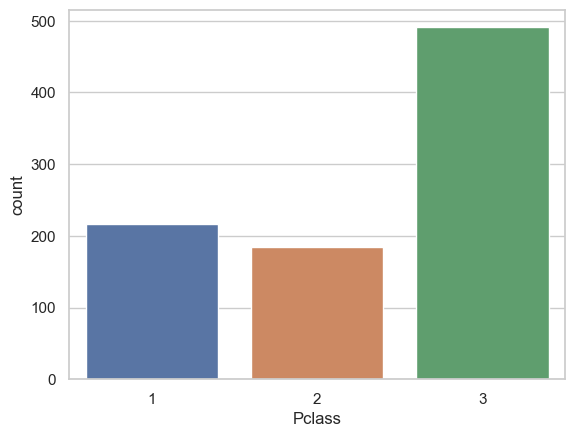

In [153]:
sns.countplot(x='Pclass',data=df)
# more people in c class 

In [154]:
# encoding the categorical columns to a numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [162]:
#seperating the independent and target variables into x and y
x=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']
print("feature dimensions",x.shape)
print("label dimension",y.shape)

feature dimensions (891, 7)
label dimension (891,)


# Checking
how the data has been distributed in each column

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

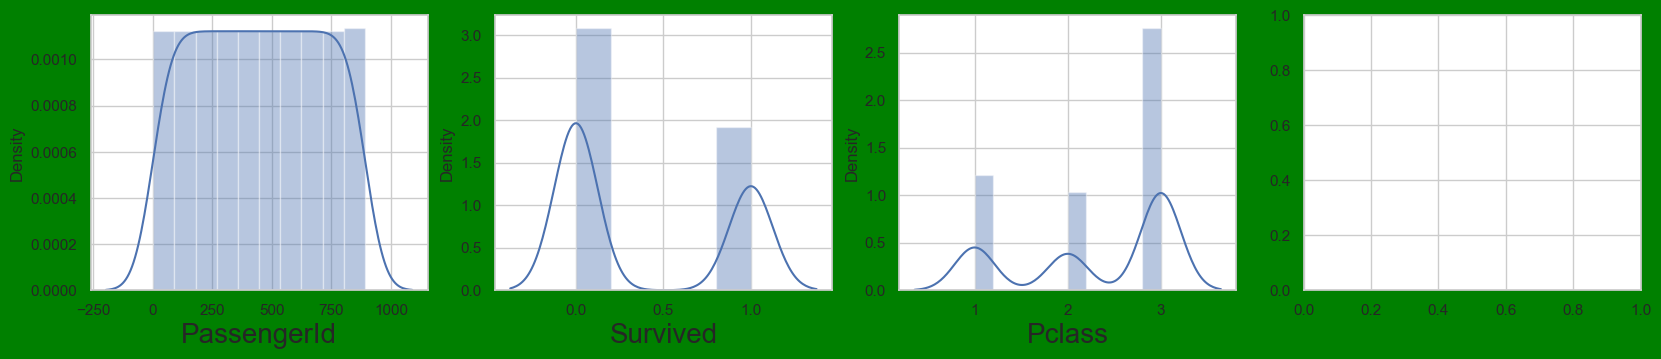

In [163]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber=1
for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [164]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [165]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


<Axes: >

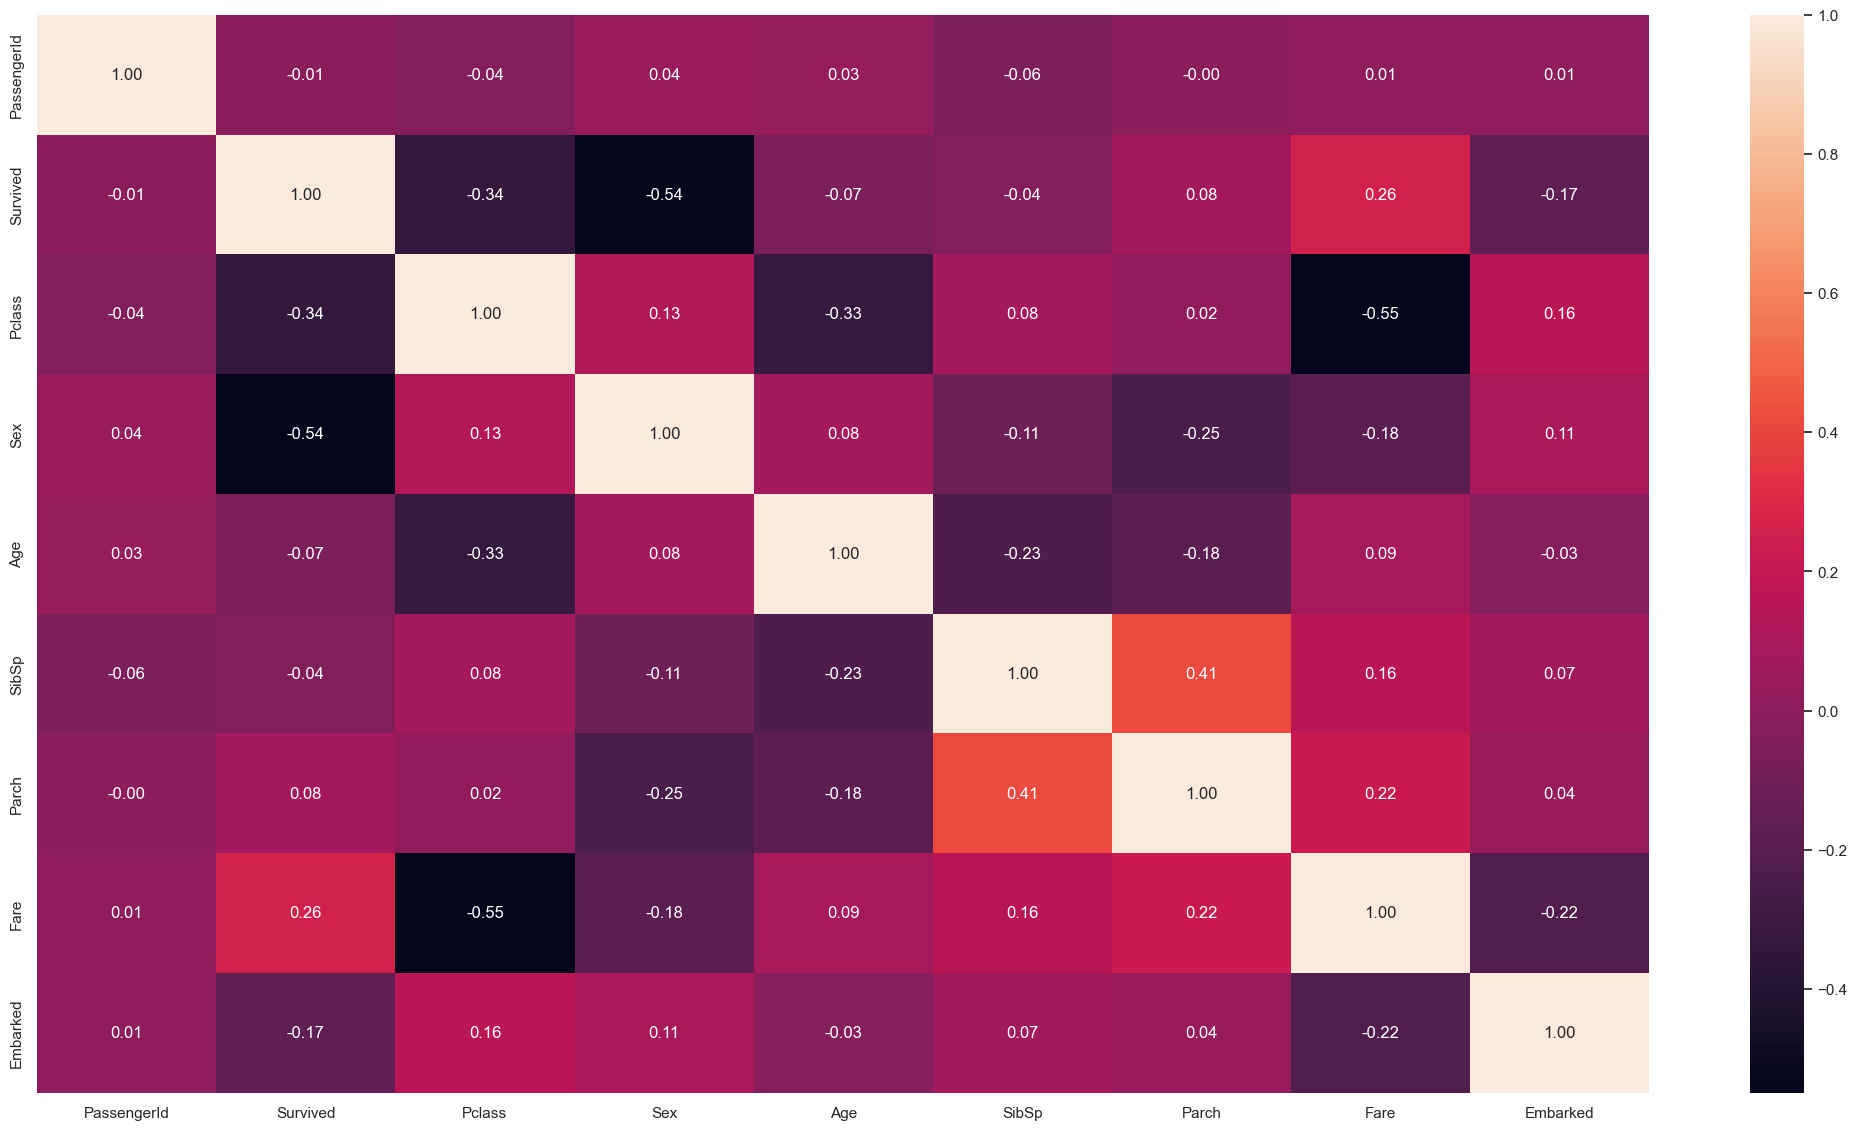

In [166]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

# Feature Scaling using Standard Scalarisation
for evaluation of the data

In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.585954
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671,0.585954
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381,0.585954
888,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263,0.585954
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381,-1.942303


In [168]:
#Checking Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,1.671580,Pclass
1,1.108869,Sex
2,1.205639,Age
3,1.282325,SibSp
4,1.322550,Parch
5,1.648696,Fare
6,1.079324,Embarked


# Modelling
for finding the best random state

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [170]:
# finding the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   # to find difference between the predicted and actual value
    if acc>maxacc: 
        maxacc=acc
        maxrs=i
print("Maximum score is",maxacc,"on Random state",maxrs)

Maximum score is 0.5067748686769369 on Random state 150


In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxrs)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [173]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_LR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y_test,pred_LR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score:  0.5067748686769369
R2 score on training data:  36.81759362798931
Mean Absolute Error 0.26967610050051977
Mean Squared Error 0.11683713825230328
Root mean squared Error 0.3418144792900138


In [174]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_RFR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error',mean_squared_error(y_test,pred_RFR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.5864001030953967
R2 score on training data:  87.42567888902471
Mean Absolute Error 0.18214506109967005
Mean Squared Error 0.09797519482868633
Root mean squared Error 0.3130098957360395


In [175]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_knn))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error',mean_squared_error(y_test,pred_knn))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.49719631093544137
R2 score on training data:  54.92039016412591
Mean Absolute Error 0.22011173184357546
Mean Squared Error 0.11910614525139665
Root mean squared Error 0.3451175817766992


In [176]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_GBR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error',mean_squared_error(y_test,pred_GBR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 score:  0.6080510784068083
R2 score on training data:  60.35691697473813
Mean Absolute Error 0.22128667286286752
Mean Squared Error 0.09284642535789538
Root mean squared Error 0.3047071140585585


In [177]:
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_ls))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error',mean_squared_error(y_test,pred_ls))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 score:  -1.770432003156408e-05
R2 score on training data:  0.0
Mean Absolute Error 0.4732989140669136
Mean Squared Error 0.23688818625476857
Root mean squared Error 0.48671160480798953


In [178]:
from sklearn.tree import DecisionTreeRegressor 

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_dtr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  0.30906128108785125
R2 score on training data:  94.98653375646542
Mean Absolute Error 0.16989447548106767
Mean Squared Error 0.16367232222911923
Root mean squared Error 0.4045643610466933


In [179]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_rd))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error',mean_squared_error(y_test,pred_rd))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score:  0.5065472018873804
R2 score on training data:  36.81752082865349
Mean Absolute Error 0.2698869330007794
Mean Squared Error 0.11689106887034682
Root mean squared Error 0.3418933589152425


In [180]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
pred_svr=dtr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_svr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  0.30906128108785125
R2 score on training data:  44.6570967195926
Mean Absolute Error 0.16989447548106767
Mean Squared Error 0.16367232222911923
Root mean squared Error 0.4045643610466933


In [181]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_etr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error',mean_squared_error(y_test,pred_etr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  0.4765744651019047
R2 score on training data:  94.98653375646542
Mean Absolute Error 0.1914214773432651
Mean Squared Error 0.12399113042278778
Root mean squared Error 0.4045643610466933


In [182]:
# Cross Validation score
from sklearn.model_selection import cross_val_score
score =cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.33410242 0.37256183 0.3832932  0.31894101 0.45339616]
0.372458923061515
Difference between R2 score and cross validation score:  13.431594561542187


In [183]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.23121058 0.36972755 0.50134245 0.31056503 0.46165129]
0.37489937981699645
Difference between R2 score and cross validation score:  21.150072327840025


In [184]:
 score2 =cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.2769209  0.30083621 0.41116341 0.34136268 0.39561077]
0.3451787945525864
Difference between R2 score and cross validation score:  15.201751638285499


In [185]:
score3 =cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.36562049 0.41507811 0.50202687 0.39281241 0.567203  ]
0.44854817735620356
Difference between R2 score and cross validation score:  23.559215534529326


In [186]:
score4 =cross_val_score(ls,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_ls)-score4.mean())*100)

[-2.08419596e-02 -2.27611210e-02 -9.50998815e-05 -2.76611585e-03
 -6.10785614e-03]
-0.010514430494024386
Difference between R2 score and cross validation score:  1.049672617399282


In [187]:
score5 =cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_rd)-score5.mean())*100)

[0.33409695 0.37272533 0.38325427 0.31907855 0.45339242]
0.37250950274080746
Difference between R2 score and cross validation score:  13.403769914657298


In [188]:
score6 =cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_dtr)-score6.mean())*100)

[-0.19561188  0.10879408  0.12568456 -0.01502906  0.09539529]
0.02384659884662079
Difference between R2 score and cross validation score:  28.521468224123048


In [189]:
score7 =cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_svr)-score7.mean())*100)

[0.39967644 0.37155611 0.3681123  0.25012217 0.58743126]
0.39537965458550695
Difference between R2 score and cross validation score:  -8.63183734976557


In [190]:
score8 =cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_etr)-score8.mean())*100)

[0.20885508 0.23244078 0.43005142 0.20790747 0.37838884]
0.29152871941162306
Difference between R2 score and cross validation score:  18.504574569028165


In [191]:
# Parameter tunning
from sklearn.model_selection import GridSearchCV
# Hyper Parameter Tunning
param={'alpha':[1.0,0.05,0.4,2],'fit_intercept':[True,False],'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],'positive':[False,True],'random_state':[1,4,10,20]}
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [192]:
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [193]:
Model=Ridge(alpha=0.05,fit_intercept=True,positive=False,random_state=1,solver='lsqr')

In [194]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('r2_score: ',r2_score(y_test,pred))
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))      

r2_score:  0.5071509298946355
Mean Absolute error: 0.2696888055372598
Mean Squared error: 0.11674805536967375
Root Mean Squared Error:  0.3416841456223478


In [195]:
import joblib
#joblib.dump(Model,"titanic.pkl")

In [196]:
import pickle
filename='titanic.pkl'
pickle.dump(Model,open(filename,'wb'))

In [197]:
import pickle 
loaded_model=pickle.load(open('titanic.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

50.71509298946355


In [198]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
Predicted,0.404183,0.165238,0.768401,0.732708,0.168217,0.517153,0.139245,0.307335,0.650166,0.759251,...,0.514344,0.205426,0.81158,0.931705,0.823884,0.288073,0.108993,0.603109,-0.018954,0.108993
original,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
